In [1]:
cd ../SP_ANALYSIS/

/home/jordan/rna-is-awesome/SP_ANALYSIS


In [2]:
%matplotlib inline

In [30]:
import SPTools

In [42]:
reload(SPTools)

<module 'SPTools' from 'SPTools.py'>

In [35]:
df1 = SPTools.build_tables("/home/jordan/SeqData/JEB004/New/JEB004count_cleavages_at_annotated_splice_sites.txt", header=[0,1], skiprows=[2])

In [36]:
df2 = SPTools.build_tables("/home/jordan/SeqData/JEB004/New/JEB004count_reads_in_transcripts.txt")

In [37]:
lengths_df = SPTools.build_tables("/home/jordan/rna-is-awesome/H99_transcript_lengths.txt")

In [38]:
config_tbl = SPTools.build_tables("/home/jordan/SeqData/JEB004/JEB004_controlratios.tbl")

In [50]:
normalized_ss_counts = SPTools.normalize_AtoB(df1, df2, lengths_df, config_tbl)

Reading sample CJB66D-A
Control value 1 = 1.0
Control value 2 = 1.44
Control value 3 = 5.88
Reading sample CJB66G-A
Control value 1 = 0.75
Control value 2 = 3.63
Control value 3 = 6.17
Reading sample CJB67D-A
Control value 1 = 2.61
Control value 2 = 2.22
Control value 3 = 6.85
Reading sample CJB67G-A
Control value 1 = 1.53
Control value 2 = 1.15
Control value 3 = 4.96
Reading table
44180


In [51]:
normalized_ss_counts_cutoff = SPTools.normalize_AtoB(df1, df2, lengths_df, config_tbl, 500)

Reading sample CJB66D-A
Control value 1 = 1.0
Control value 2 = 1.44
Control value 3 = 5.88
Reading sample CJB66G-A
Control value 1 = 0.75
Control value 2 = 3.63
Control value 3 = 6.17
Reading sample CJB67D-A
Control value 1 = 2.61
Control value 2 = 2.22
Control value 3 = 6.85
Reading sample CJB67G-A
Control value 1 = 1.53
Control value 2 = 1.15
Control value 3 = 4.96
Reading table
2279


In [52]:
mature_df = SPTools.normalize_to_mature(df2,lengths_df,config_tbl)

('CJB66D', 'Total')
('CJB66G', 'Total')
('CJB67D', 'Total')
('CJB67G', 'Total')
[[1.0, 1.4399999999999999, 5.8799999999999999], [0.75, 3.6299999999999999, 6.1699999999999999], [2.6099999999999999, 2.2200000000000002, 6.8499999999999996], [1.53, 1.1499999999999999, 4.96]]
Reading sample CJB66D-B
Control value 1 = 1.0
Control value 2 = 1.44
Control value 3 = 5.88
Reading sample CJB66G-B
Control value 1 = 0.75
Control value 2 = 3.63
Control value 3 = 6.17
Reading sample CJB67D-B
Control value 1 = 2.61
Control value 2 = 2.22
Control value 3 = 6.85
Reading sample CJB67G-B
Control value 1 = 1.53
Control value 2 = 1.15
Control value 3 = 4.96
7810


In [53]:
mature_df_cutoff = SPTools.normalize_to_mature(df2,lengths_df,config_tbl,cutoff=500)

('CJB66D', 'Total')
('CJB66G', 'Total')
('CJB67D', 'Total')
('CJB67G', 'Total')
[[1.0, 1.4399999999999999, 5.8799999999999999], [0.75, 3.6299999999999999, 6.1699999999999999], [2.6099999999999999, 2.2200000000000002, 6.8499999999999996], [1.53, 1.1499999999999999, 4.96]]
Reading sample CJB66D-B
Control value 1 = 1.0
Control value 2 = 1.44
Control value 3 = 5.88
Reading sample CJB66G-B
Control value 1 = 0.75
Control value 2 = 3.63
Control value 3 = 6.17
Reading sample CJB67D-B
Control value 1 = 2.61
Control value 2 = 2.22
Control value 3 = 6.85
Reading sample CJB67G-B
Control value 1 = 1.53
Control value 2 = 1.15
Control value 3 = 4.96
306


In [54]:
RNAi_targets_counts = SPTools.filter_transcripts_by_cnag(normalized_ss_counts, "/home/jordan/rna-is-awesome/H99_RNAi_targets.txt")

0


In [55]:
RNAi_mature_df = SPTools.filter_transcripts_by_cnag(mature_df, "/home/jordan/rna-is-awesome/H99_RNAi_targets.txt")

92


CJB66D
5prime Normalized
-0.883030193063
3.38078405455


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


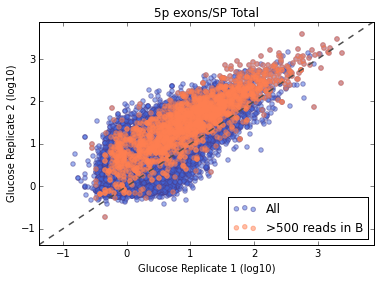

In [56]:
SPTools.scatter_plot2(("CJB66D","5prime Normalized"), ("CJB67D","5prime Normalized"), normalized_ss_counts, normalized_ss_counts_cutoff, plot_title='5p exons/SP Total', legend1='All', legend2='>500 reads in B', xlabel='Glucose Replicate 1 (log10)', ylabel='Glucose Replicate 2 (log10)')

CJB66D
5prime Normalized
-0.883030193063
3.38078405455


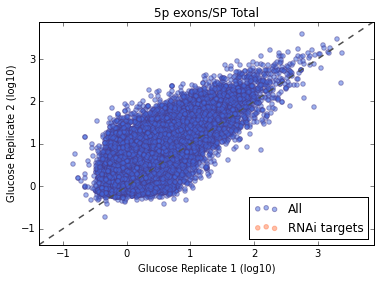

In [57]:
SPTools.scatter_plot2(("CJB66D","5prime Normalized"), ("CJB67D","5prime Normalized"), normalized_ss_counts, RNAi_targets_counts, plot_title='5p exons/SP Total', legend1='All', legend2='RNAi targets', xlabel='Glucose Replicate 1 (log10)', ylabel='Glucose Replicate 2 (log10)')

CJB66D
Normalized to mature
-1.53292600422
1.97988768799


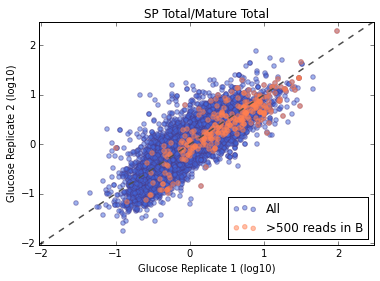

In [58]:
SPTools.scatter_plot2(("CJB66D","Normalized to mature"), ("CJB67D","Normalized to mature"), mature_df, mature_df_cutoff, plot_title='SP Total/Mature Total', legend1='All', legend2='>500 reads in B', xlabel='Glucose Replicate 1 (log10)', ylabel='Glucose Replicate 2 (log10)')

CJB66D
Normalized to mature
-1.53292600422
1.97988768799


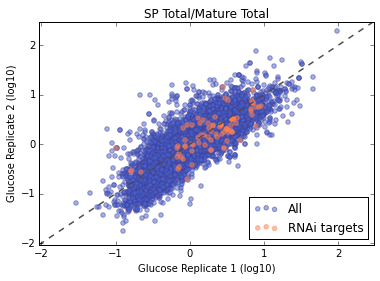

In [59]:
SPTools.scatter_plot2(("CJB66D","Normalized to mature"), ("CJB67D","Normalized to mature"), mature_df, RNAi_mature_df, plot_title='SP Total/Mature Total', legend1='All', legend2='RNAi targets', xlabel='Glucose Replicate 1 (log10)', ylabel='Glucose Replicate 2 (log10)')

CJB66G
5prime Normalized
-0.757814742111
3.03905736342


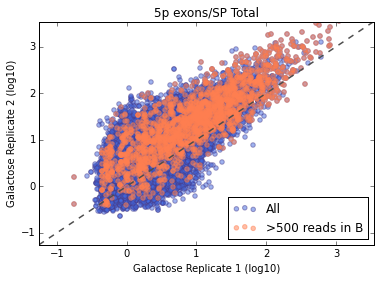

In [60]:
SPTools.scatter_plot2(("CJB66G","5prime Normalized"), ("CJB67G","5prime Normalized"), normalized_ss_counts, normalized_ss_counts_cutoff, plot_title='5p exons/SP Total', legend1='All', legend2='>500 reads in B', xlabel='Galactose Replicate 1 (log10)', ylabel='Galactose Replicate 2 (log10)')

CJB66G
5prime Normalized
-0.757814742111
3.03905736342


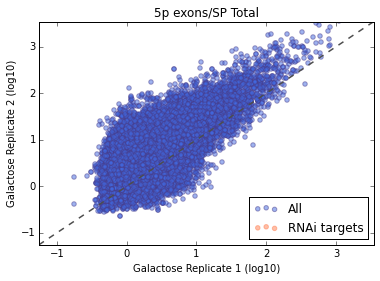

In [61]:
SPTools.scatter_plot2(("CJB66G","5prime Normalized"), ("CJB67G","5prime Normalized"), normalized_ss_counts, RNAi_targets_counts, plot_title='5p exons/SP Total', legend1='All', legend2='RNAi targets', xlabel='Galactose Replicate 1 (log10)', ylabel='Galactose Replicate 2 (log10)')

CJB66G
Normalized to mature
-1.66624787332
1.97879460197


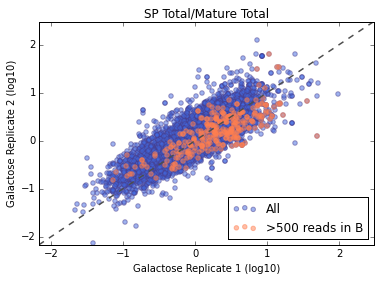

In [62]:
SPTools.scatter_plot2(("CJB66G","Normalized to mature"), ("CJB67G","Normalized to mature"), mature_df, mature_df_cutoff, plot_title='SP Total/Mature Total', legend1='All', legend2='>500 reads in B', xlabel='Galactose Replicate 1 (log10)', ylabel='Galactose Replicate 2 (log10)')

CJB66G
Normalized to mature
-1.66624787332
1.97879460197


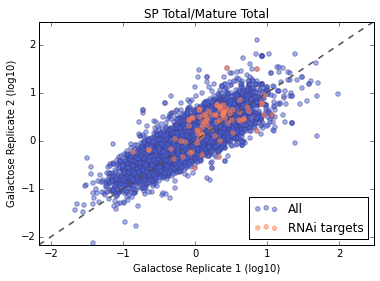

In [63]:
SPTools.scatter_plot2(("CJB66G","Normalized to mature"), ("CJB67G","Normalized to mature"), mature_df, RNAi_mature_df, plot_title='SP Total/Mature Total', legend1='All', legend2='RNAi targets', xlabel='Galactose Replicate 1 (log10)', ylabel='Galactose Replicate 2 (log10)')

CJB66D
5prime Normalized
-0.883030193063
3.38078405455


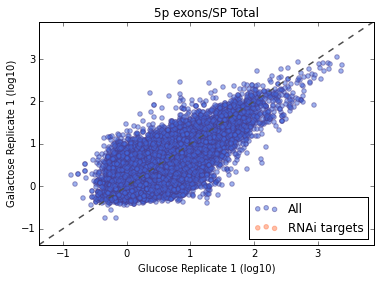

In [64]:
SPTools.scatter_plot2(("CJB66D","5prime Normalized"), ("CJB66G","5prime Normalized"), normalized_ss_counts, RNAi_targets_counts, plot_title='5p exons/SP Total', legend1='All', legend2='RNAi targets', xlabel='Glucose Replicate 1 (log10)', ylabel='Galactose Replicate 1 (log10)')

CJB67D
5prime Normalized
-0.769257537224
3.59370909277


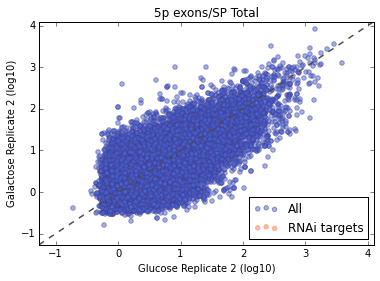

In [65]:
SPTools.scatter_plot2(("CJB67D","5prime Normalized"), ("CJB67G","5prime Normalized"), normalized_ss_counts, RNAi_targets_counts, plot_title='5p exons/SP Total', legend1='All', legend2='RNAi targets', xlabel='Glucose Replicate 2 (log10)', ylabel='Galactose Replicate 2 (log10)')

CJB66D
Normalized to mature
-1.53292600422
1.97988768799


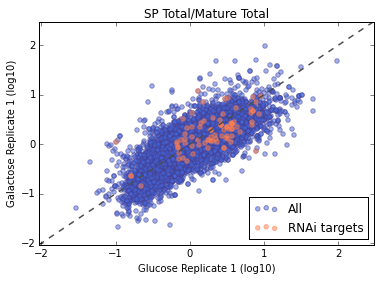

In [66]:
SPTools.scatter_plot2(("CJB66D","Normalized to mature"), ("CJB66G","Normalized to mature"), mature_df, RNAi_mature_df, plot_title='SP Total/Mature Total', legend1='All', legend2='RNAi targets', xlabel='Glucose Replicate 1 (log10)', ylabel='Galactose Replicate 1 (log10)')

CJB67D
Normalized to mature
-1.74450426723
2.28392231131


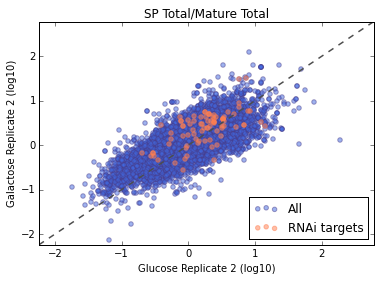

In [67]:
SPTools.scatter_plot2(("CJB67D","Normalized to mature"), ("CJB67G","Normalized to mature"), mature_df, RNAi_mature_df, plot_title='SP Total/Mature Total', legend1='All', legend2='RNAi targets', xlabel='Glucose Replicate 2 (log10)', ylabel='Galactose Replicate 2 (log10)')

In [68]:
listA = ["CNAG_06699T0","CNAG_00483T0", "CNAG_00147T0", "CNAG_05894T0", "CNAG_02714T0", "CNAG_03739T0"]

In [69]:
listB = ["CNAG_03387T0", "CNAG_06757T0", "CNAG_05212T0", "CNAG_06844T0", "CNAG_07421T0", "CNAG_04590T0", "CNAG_06705T0", "CNAG_05185T0", "CNAG_00903T0"]

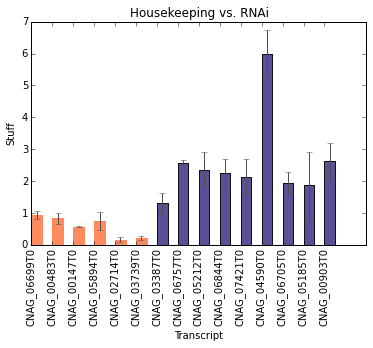

In [70]:
SPTools.bar_chart_transcripts(mature_df, "Normalized to mature", "CJB66D", "CJB67D", listA, listB, plot_title="Housekeeping vs. RNAi")

In [81]:
reload(SPTools)

<module 'SPTools' from 'SPTools.py'>

In [ ]:
SPTools.bar_chart_introns(normalized_ss_counts,"5prime Normalized" ,"CJB66D", "CJB67D", listA, listB, plot_title="Housekeeping vs. RNAi")

CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0
CNAG_00001T0

KeyboardInterrupt: 

In [594]:
list1 = SPTools.random_transcripts_from_list("/home/jordan/rna-is-awesome/H99_RNAi_targets.txt", 10)

In [595]:
list2 = SPTools.random_transcripts_from_list("/home/jordan/rna-is-awesome/H99_transcript_lengths.txt", 10)

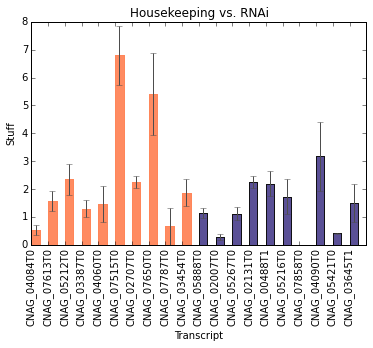

In [596]:
SPTools.bar_chart(mature_df, "CJB66D", "CJB67D", list1, list2, plot_title="Housekeeping vs. RNAi")

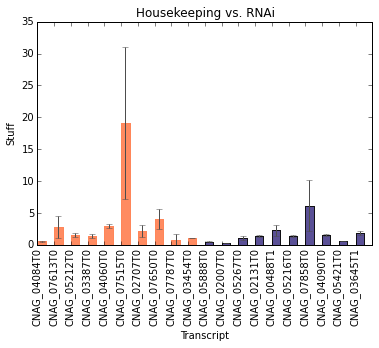

In [597]:
SPTools.bar_chart(mature_df, "CJB66G", "CJB67G", list1, list2, plot_title="Housekeeping vs. RNAi")